# Data Cleaning (Cleansing)

The process of correcting or removing corrupt/inaccurate
data from a dataset. Data cleaning refers to identifying the incomplete, incorrect, inaccurate, or irrelevant part of data and replacing, modifying, or deleting the dirty data.

## This notebook includes techniques on how to find and clean:

- Missing Data
- Irregular Data. Such as outliers.
- Repetitive data, duplicates, unnecessary data
- Inconsistent Data. Capitalization, Addrresses.  **TODO: Does not apply well for with PeaceSYS dataset**

## 0.0 About the data

For this notebook we will use the **anthropological dataset** that contains information about countries. The number 9 in each obervation represent NaN

In [90]:
# allows surpression of warnings
import warnings
warnings.filterwarnings("ignore")

# import datasets
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib

plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
# set desired size for figure size
matplotlib.rcParams['figure.figsize'] = (12, 8) 

pd.options.mode.chained_assignment = None

In [91]:
DATA_LOCATION = "./datasets/peace_sys.csv"

In [92]:
df = pd.read_csv(DATA_LOCATION).replace(9, np.nan)

### 0.1 Shape

Figuring out the size of a dataset is a good start to data cleaning.
This tells use how many rows and columns exists in the dataset. 

In [93]:
# returns a tuple format (x, y)
# x is the number of rows
# y is the number of columns
df.shape

(46, 37)

### 0. 2 Data types
Another useful type of information is the data type of each column or feature. This helps us identify which features are number or categorical.

In [94]:
df.dtypes[:10]

Name           object
SCCS            int64
Coder          object
ID1.1Over     float64
ID1.2Ethno    float64
Int2.1Mar     float64
Int2.2Econ    float64
Int2.3Pol     float64
Int2.4Hist    float64
Dep3.1Sec     float64
dtype: object

### 0.3 Separating
Lets take a look at an example that shows us how to separate numerical and categorical features from each other.

In [95]:
# select_dtypes allows to include the datatype 
# df_numeric only contains features of the type np.number
df_numeric = df.select_dtypes(include=[np.number])
# store numeric features
numeric_cols = df_numeric.columns.values

In [96]:
# take a peek into the first 5 samples
df_numeric.head()

,SCCS,ID1.1Over,ID1.2Ethno,Int2.1Mar,Int2.2Econ,Int2.3Pol,Int2.4Hist,Dep3.1Sec,Dep3.2Ecol,Dep3.3Econ,...,CM8.5Peace,CM8.6War,Lead9.1P,Lead9.2War,Cult10.1Com,Cult10.2Diff,Comp10.3,InComp10.4,PSys,PSysRec
0,107,NaN,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0
1,108,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,3.0,...,NaN,2.0,NaN,4.0,NaN,NaN,NaN,NaN,2,0
2,135,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2,0
3,154,NaN,3.0,NaN,3.0,NaN,NaN,NaN,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0
4,35,NaN,2.0,3.0,4.0,NaN,4.0,NaN,2.0,3.0,...,NaN,NaN,NaN,NaN,3.0,NaN,3.0,3.0,2,0


In [97]:
# select_dtypes also allows for exlusion of a datatype
# df_non_numeric contains features that are not np.number
df_non_numeric = df.select_dtypes(exclude=[np.number])
# store non number features
non_numeric_cols = df_non_numeric.columns.values

In [98]:
# take a peek into the first 5 samples
df_non_numeric.head()

,Name,Coder
0,Gilbertese,KA
1,Marshallese,EC
2,E. Pomo,"KA, EC"
3,Popoluca,KA
4,Konso,KA


## 1.0 Visualizing Missing Data

Lets explore how we can deal with missing data. Dealing with missing data is by far the most important part of data cleaning. 

Most models do not accept missing data.

### 1. 1 Heatmap

When dealing with a small number of features, we can visualize the meissing data with a heatmap. 

The heatmap below shows the missing data pattern for the first 20 features. 

The horizontal axis shows the feature name.
The vertical axis represents the number of rows

The green represents missing values.

If we look at the first value in the "id" feature in the horizontal axis, 
we see that many observations are missing their respective "id". 

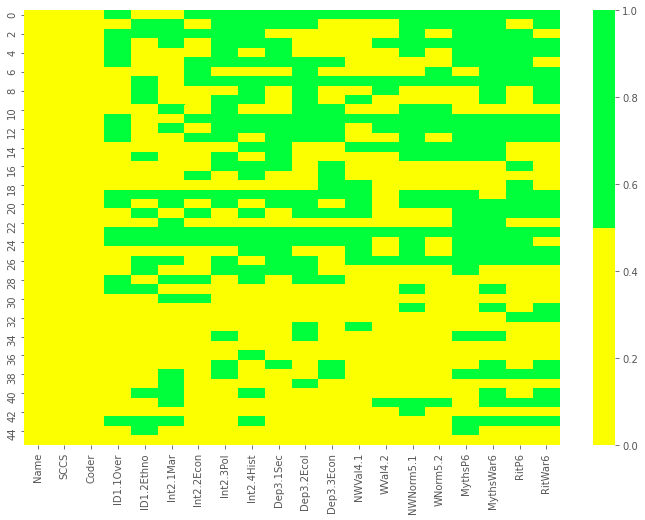

In [99]:
# get the first 20 columns
cols = df.columns[:20]
colors = ['#fbff00', '#00ff3b']
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colors)) 

### 1.2 Percentage List

Lets create list that tells us the percent of missing data for each particular feature.

In [100]:
# for large datasets, this could take a long time. 
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Name - 0.0%
SCCS - 0.0%
Coder - 0.0%
ID1.1Over - 33.0%
ID1.2Ethno - 35.0%
Int2.1Mar - 39.0%
Int2.2Econ - 30.0%
Int2.3Pol - 50.0%
Int2.4Hist - 50.0%
Dep3.1Sec - 43.0%
Dep3.2Ecol - 48.0%
Dep3.3Econ - 37.0%
NWVal4.1 - 30.0%
WVal4.2 - 22.0%
NWNorm5.1 - 48.0%
WNorm5.2 - 33.0%
MythsP6 - 54.0%
MythsWar6 - 65.0%
RitP6 - 50.0%
RitWar6 - 52.0%
SymP6 - 72.0%
SymWar6 - 57.0%
SuperOrd7 - 48.0%
CM8.1Neg - 59.0%
CM8.2Med - 83.0%
CM8.3Arb - 85.0%
CM8.4Adj - 70.0%
CM8.5Peace - 78.0%
CM8.6War - 78.0%
Lead9.1P - 63.0%
Lead9.2War - 65.0%
Cult10.1Com - 57.0%
Cult10.2Diff - 63.0%
Comp10.3 - 70.0%
InComp10.4 - 76.0%
PSys - 0.0%
PSysRec - 0.0%


### 1.3 Histogram

Another way to visualize missing data is a histogram.
The histogram allows us to identify the missing values among all observations

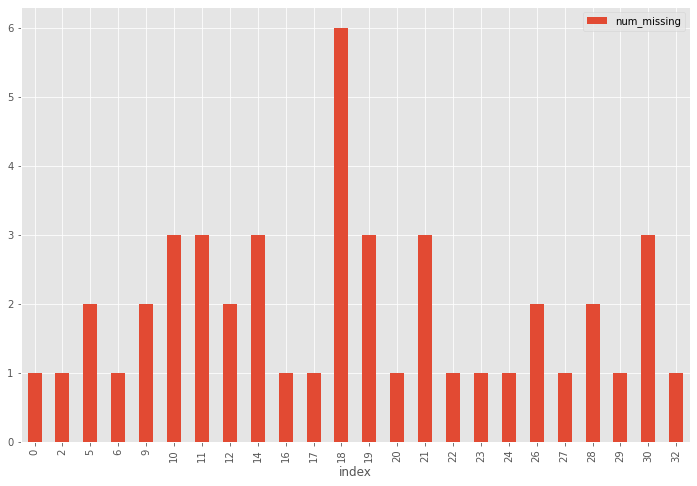

In [101]:
# first create missing indicator for features with missing data
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        df['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

## 2.0 Dealing With Missing Data

Depending on the dataset that you're analyzing, you'll have to decide which technique works best for dealing with the dataset.

Though there is one size fits all answer, studying/analysing the data can provide nuances that can help you decide. 

### 2.1 Obsevation Dropping

If an observation contains missing values, dropping the entire observation is a simple option. 

If you are sure that the observation does not provide any unique insight, you can drop it.

We can set a threshold that drop observations that contain more than X number of missing values

df_less_missing_rows has observations with over 35 missing features

In [102]:
idx_missing = df[df['num_missing'] > 10].index
df_less_missing_rows = df.drop(idx_missing, axis=0)

In [103]:
df_less_missing_rows.head()

,Name,SCCS,Coder,ID1.1Over,ID1.2Ethno,Int2.1Mar,Int2.2Econ,Int2.3Pol,Int2.4Hist,Dep3.1Sec,...,CM8.4Adj_ismissing,CM8.5Peace_ismissing,CM8.6War_ismissing,Lead9.1P_ismissing,Lead9.2War_ismissing,Cult10.1Com_ismissing,Cult10.2Diff_ismissing,Comp10.3_ismissing,InComp10.4_ismissing,num_missing
22,Shavante,179,KA,2.0,3.0,NaN,2.0,1.0,1.0,1.0,...,True,True,True,False,False,False,False,False,False,9
30,Switzerland,200,DM,3.0,3.0,NaN,NaN,2.0,4.0,4.0,...,False,False,False,False,True,False,False,True,True,5
31,Iroquois,201,KA,3.5,2.5,3.0,3.5,4.0,4.0,4.0,...,True,False,True,False,True,False,False,False,True,10
32,Orang Asli,202,DPF,3.0,3.0,2.0,2.0,1.0,3.0,1.0,...,False,True,True,True,False,False,False,False,False,10
33,Nilgiri Pla.,203,DPF,2.0,3.0,1.0,4.0,2.0,4.0,1.0,...,True,True,True,True,True,False,False,False,False,9


### 2.2 Feature Dropping

Another alternative is dropping the entire feature.
If we see that a feature has a high percentage of missing data, we may want to drop the entire feature

In [104]:
cols_to_drop = ['SCCS']
df_less_sccs = df.drop(cols_to_drop, axis=1)

In [105]:
df_less_sccs.head()

,Name,Coder,ID1.1Over,ID1.2Ethno,Int2.1Mar,Int2.2Econ,Int2.3Pol,Int2.4Hist,Dep3.1Sec,Dep3.2Ecol,...,CM8.4Adj_ismissing,CM8.5Peace_ismissing,CM8.6War_ismissing,Lead9.1P_ismissing,Lead9.2War_ismissing,Cult10.1Com_ismissing,Cult10.2Diff_ismissing,Comp10.3_ismissing,InComp10.4_ismissing,num_missing
0,Gilbertese,KA,NaN,2.0,3.0,NaN,NaN,NaN,NaN,NaN,...,True,True,True,True,True,True,True,True,True,30
1,Marshallese,EC,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,True,True,False,True,False,True,True,True,True,21
2,E. Pomo,"KA, EC",NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,...,True,True,True,False,True,True,True,True,True,21
3,Popoluca,KA,NaN,3.0,NaN,3.0,NaN,NaN,NaN,3.0,...,True,True,True,True,True,True,True,True,True,27
4,Konso,KA,NaN,2.0,3.0,4.0,NaN,4.0,NaN,2.0,...,True,True,True,True,True,False,True,False,False,18


### 2.3 Impute Missing Data

When imputing missing data, we replace the missing values with the average or median value from 
the data of the same feature that is not missing. 

If the feature is categorical, we can consider imputing the missing data by the mode. 

In [106]:
med = df['Int2.1Mar'].median()
med

2.0

In [107]:
df['Int2.1Mar'] = df['Int2.1Mar'].fillna(med)

What if we only want to impute all numeric features? 

In [108]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values

for col in numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing) # sum up all missing observations
    # do imputations if the feature contains missing values
    if num_missing > 0:
        df['{}_ismissing'.format(col)] = missing
        med = df[col].median()
        df[col] = df[col].fillna(med)

In [109]:
# we can see the last column (num_missing) to see the number of missing data for each observation
df_numeric.head()

,SCCS,ID1.1Over,ID1.2Ethno,Int2.1Mar,Int2.2Econ,Int2.3Pol,Int2.4Hist,Dep3.1Sec,Dep3.2Ecol,Dep3.3Econ,...,CM8.6War,Lead9.1P,Lead9.2War,Cult10.1Com,Cult10.2Diff,Comp10.3,InComp10.4,PSys,PSysRec,num_missing
0,107,NaN,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0,30
1,108,1.0,NaN,2.0,1.0,NaN,NaN,NaN,NaN,3.0,...,2.0,NaN,4.0,NaN,NaN,NaN,NaN,2,0,21
2,135,NaN,NaN,2.0,NaN,NaN,NaN,1.0,1.0,1.0,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2,0,21
3,154,NaN,3.0,2.0,3.0,NaN,NaN,NaN,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0,27
4,35,NaN,2.0,3.0,4.0,NaN,4.0,NaN,2.0,3.0,...,NaN,NaN,NaN,3.0,NaN,3.0,3.0,2,0,18


What if we only want to impute all categorical features?

In [110]:
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values

for col in non_numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:
        df['{}_ismissing'.format(col)] = missing
        
        top = df[col].describe()['top']
        df[col] = df[col].fillna(top)

In [111]:
df_non_numeric.head()

,Name,Coder,ID1.1Over_ismissing,ID1.2Ethno_ismissing,Int2.1Mar_ismissing,Int2.2Econ_ismissing,Int2.3Pol_ismissing,Int2.4Hist_ismissing,Dep3.1Sec_ismissing,Dep3.2Ecol_ismissing,...,CM8.3Arb_ismissing,CM8.4Adj_ismissing,CM8.5Peace_ismissing,CM8.6War_ismissing,Lead9.1P_ismissing,Lead9.2War_ismissing,Cult10.1Com_ismissing,Cult10.2Diff_ismissing,Comp10.3_ismissing,InComp10.4_ismissing
0,Gilbertese,KA,True,False,False,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,Marshallese,EC,False,True,True,False,True,True,True,True,...,True,True,True,False,True,False,True,True,True,True
2,E. Pomo,"KA, EC",True,True,True,True,True,True,False,False,...,False,True,True,True,False,True,True,True,True,True
3,Popoluca,KA,True,False,True,False,True,True,True,False,...,True,True,True,True,True,True,True,True,True,True
4,Konso,KA,True,False,False,False,True,False,True,False,...,True,True,True,True,True,True,False,True,False,False


### 2.4 Replace
We can also replace missing valuse with place holders

In [112]:
# categorical
df['ID1.1Over'] = df['ID1.1Over'].fillna('MISSING')
# numeric
df['Int2.1Mar'] = df['Int2.1Mar'].fillna(-1)

In [113]:
df[:10]

,Name,SCCS,Coder,ID1.1Over,ID1.2Ethno,Int2.1Mar,Int2.2Econ,Int2.3Pol,Int2.4Hist,Dep3.1Sec,...,CM8.4Adj_ismissing,CM8.5Peace_ismissing,CM8.6War_ismissing,Lead9.1P_ismissing,Lead9.2War_ismissing,Cult10.1Com_ismissing,Cult10.2Diff_ismissing,Comp10.3_ismissing,InComp10.4_ismissing,num_missing
0,Gilbertese,107,KA,3.0,2.0,3.0,3.0,2.0,3.0,3.0,...,True,True,True,True,True,True,True,True,True,30
1,Marshallese,108,EC,1.0,2.5,2.0,1.0,2.0,3.0,3.0,...,True,True,False,True,False,True,True,True,True,21
2,E. Pomo,135,"KA, EC",3.0,2.5,2.0,3.0,2.0,3.0,1.0,...,True,True,True,False,True,True,True,True,True,21
3,Popoluca,154,KA,3.0,3.0,2.0,3.0,2.0,3.0,3.0,...,True,True,True,True,True,True,True,True,True,27
4,Konso,35,KA,3.0,2.0,3.0,4.0,2.0,4.0,3.0,...,True,True,True,True,True,False,True,False,False,18
5,Bribri,157,DG,3.0,2.0,2.0,3.0,2.0,3.0,3.0,...,True,True,True,True,True,True,True,True,True,23
6,Tallensi,23,DG,1.0,2.0,4.0,3.0,1.0,3.0,3.0,...,False,False,True,True,True,False,False,False,True,14
7,Russians,54,DG,4.0,2.5,1.0,3.0,2.0,3.0,3.0,...,False,False,False,False,True,False,True,True,True,24
8,Trukese,109,DG,3.0,2.5,4.0,4.0,3.0,3.0,3.0,...,False,True,True,True,True,True,True,True,True,18
9,Toraja,87,DG,1.0,2.5,1.0,1.0,2.0,3.0,1.0,...,True,True,True,True,True,True,True,True,True,21


## 3.0 Outliers

Outliers are extreme values that deviate from other observations. 

How can we find outliers in our dataset?

### 3.1 Histogram/Box Plot

For numeric features we can use a histogram.

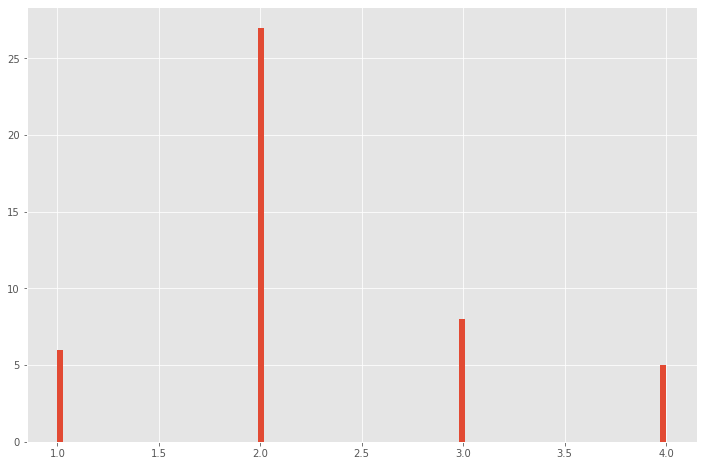

In [114]:
df['Int2.1Mar'].hist(bins=100)

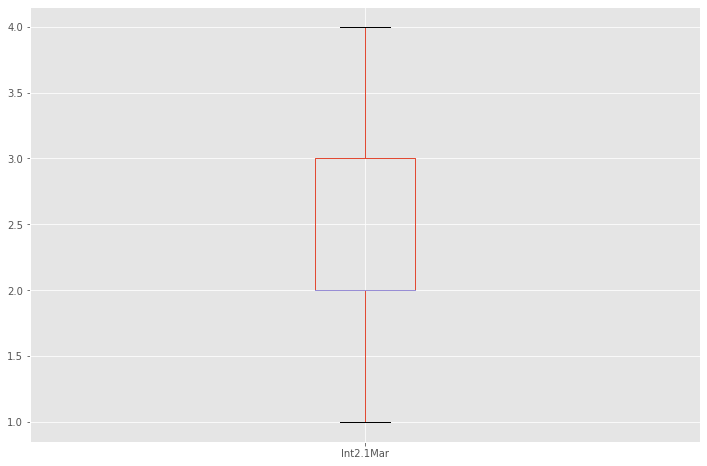

In [115]:
df.boxplot(column=['Int2.1Mar'])

### 3.2 Descriptive Statistics

In [116]:
df['Int2.1Mar'].describe()

count    46.000000
mean      2.260870
std       0.828245
min       1.000000
25%       2.000000
50%       2.000000
75%       3.000000
max       4.000000
Name: Int2.1Mar, dtype: float64

### 3.3 TODO: Perhaps use Z-score, or Clustering


## 4.0 Unnecessary Data

Lets look at ways to remove overredundant data. 

Which data provides no value when we feed it to the model? 

### 4.1 Uninformative/Repetative

We can create a list that shows the percentages of the same values. 
Lets find the features that have 75% of the same value.

In [117]:
num_rows = len(df.index)
low_information_cols = []

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts / num_rows).iloc[0]
    
    if top_pct > 0.75:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

NWNorm5.1: 76.08696%
4.0    35
2.0     5
1.0     3
3.0     3
Name: NWNorm5.1, dtype: int64

MythsWar6: 76.08696%
2.0    35
1.0     4
3.0     4
4.0     2
1.5     1
Name: MythsWar6, dtype: int64

SymP6: 76.08696%
3.0    35
2.0     6
4.0     5
Name: SymP6, dtype: int64

CM8.2Med: 89.13043%
3.0    41
2.0     3
4.0     2
Name: CM8.2Med, dtype: int64

CM8.3Arb: 89.13043%
2.0    41
1.0     3
4.0     2
Name: CM8.3Arb, dtype: int64

CM8.4Adj: 76.08696%
2.0    35
1.0     6
4.0     4
2.5     1
Name: CM8.4Adj, dtype: int64

CM8.5Peace: 91.30435%
4.0    42
2.0     3
1.0     1
Name: CM8.5Peace, dtype: int64

CM8.6War: 89.13043%
1.0    41
2.0     3
4.0     1
0.0     1
Name: CM8.6War, dtype: int64

Cult10.2Diff: 91.30435%
1.0    42
2.0     2
4.0     1
3.0     1
Name: Cult10.2Diff, dtype: int64

Comp10.3: 80.43478%
3.0    37
4.0     4
1.0     3
2.0     2
Name: Comp10.3, dtype: int64

InComp10.4: 89.13043%
1.0    41
2.0     2
3.0     2
4.0     1
Name: InComp10.4, dtype: int64

WVal4.2_ismissing: 78.2608

### 4.2 Irrelevance

How can do we find features that do not contain relevant observations. 
If the feature does not provide any relevance or insights to the dataset, you can simply drop that
particular feature. To see how to drop features look at section [2.2 Feature Dropping](#2.2-Feature-Dropping)

### 4.3 Duplicates

In [118]:
df_dedupped = df.drop('SCCS', axis=1).drop_duplicates()

In [119]:
df.shape

(46, 70)

In [120]:
# no duplicate features
df_dedupped.shape

(46, 69)